In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import os
plt.rcParams.update({'font.size': 18})

In [10]:
# Get all items (files and directories) in the current directory
# all_items = [item for item in os.listdir('.') if os.path.isdir(item) and item != '__pycache__']

all_items =['Optimal',
            'APST4',
            'IT',
            'Baseline']
markers ={'Optimal': 7,
            'APST4': 'X',
            'IT': 6,
            'Baseline': 'x'}
colors ={'Optimal': 'red',
            'APST4': 'green',
            'IT': 'orange',
            'Baseline': 'blue'}
legends ={'Optimal': 'Optimal Nexullance_MP_APST4',
            'APST4': 'Nexullance_MP_APST4',
            'IT': 'Nexullance_IT',
            'Baseline': 'Baseline'}

In [11]:
# Create a dictionary where keys are directory names and values are their absolute paths
directories_dict = {
    item: os.path.abspath(item)
    for item in all_items
}

In [12]:
display(directories_dict)

{'Optimal': '/users/ziyzhang/topology-research/Nexullance_journal_data_gen/perturbations_abs/Optimal',
 'APST4': '/users/ziyzhang/topology-research/Nexullance_journal_data_gen/perturbations_abs/APST4',
 'IT': '/users/ziyzhang/topology-research/Nexullance_journal_data_gen/perturbations_abs/IT',
 'Baseline': '/users/ziyzhang/topology-research/Nexullance_journal_data_gen/perturbations_abs/Baseline'}

In [13]:
def plot_for(topo_name, traffic, V:int):
    raw_data = {}
    for method_name, abs_path in directories_dict.items():
        # first check the file exists:
        if not os.path.exists(os.path.join(abs_path, topo_name+".csv")):
            print(f"File {topo_name}.csv does not exist in {abs_path}")
            continue
        raw_data[method_name] = pd.read_csv(os.path.join(os.path.join(abs_path, topo_name+".csv") ))
        
    plot_data = { item: [] for item in raw_data.keys() }
    plot_errors = { item: [] for item in raw_data.keys() }
    perturbations =  list(np.arange(0.0, 0.5, 0.01)) # 0 ~ 0.49

    for method_name, df in raw_data.items():
        filtered_df = df[(df["traffic"]==traffic) & (df["V"]== V)]
        ave_Phi_per_EP = list(filtered_df["Phi_per_EP"])
        min_Phi_per_EP = list(filtered_df["min"])
        max_Phi_per_EP = list(filtered_df["max"])

        plot_data[method_name] = ave_Phi_per_EP     
        plot_errors[method_name] = [[ave_Phi_per_EP[i]-min_Phi_per_EP[i], max_Phi_per_EP[i]-ave_Phi_per_EP[i]] for i in range(len(ave_Phi_per_EP))]

    # Plotting
    plt.figure(figsize=(4, 3))  # Adjust size if necessary
    plt.hlines(10.0, 0, 1, colors="red")

    for method_name in plot_data.keys():
        error_bars = np.array(plot_errors[method_name]).swapaxes(0, 1)
        plt.errorbar(perturbations, plot_data[method_name], error_bars, color=colors[method_name],
                     label=legends[method_name], marker=markers[method_name], ecolor=colors[method_name], capsize=2, fmt='o')

    # Adding labels and title
    plt.xlabel("perturbation rate")
    plt.ylabel("$\Phi$ per EP [GBps]")
    # if normalized:
    #     plt.ylim(0, 1)
    # plt.title(topo_name + f" {V} " + traffic)
    plt.title(traffic + "\n demand matrix")

    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=4)
    plt.xlim(0, 0.5)
    plt.ylim(0, 11)

    # Show plot
    plt.show()

<>:34: SyntaxWarning: invalid escape sequence '\P'
<>:34: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipykernel_3746044/2547614077.py:34: SyntaxWarning: invalid escape sequence '\P'
  plt.ylabel("$\Phi$ per EP [GBps]")


/tmp/ipykernel_3746044/2547614077.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(perturbations, plot_data[method_name], error_bars, color=colors[method_name],


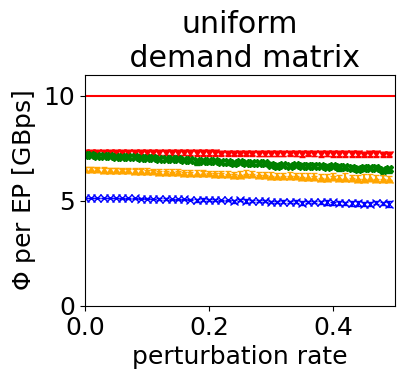

/tmp/ipykernel_3746044/2547614077.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(perturbations, plot_data[method_name], error_bars, color=colors[method_name],


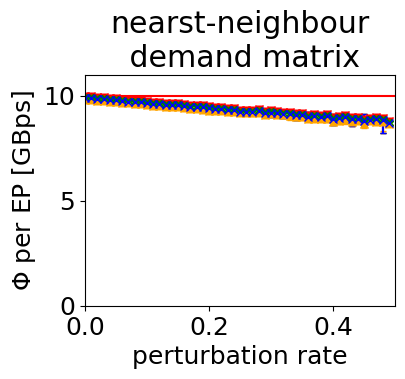

/tmp/ipykernel_3746044/2547614077.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(perturbations, plot_data[method_name], error_bars, color=colors[method_name],


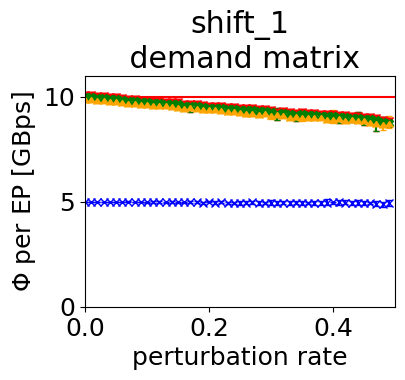

/tmp/ipykernel_3746044/2547614077.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(perturbations, plot_data[method_name], error_bars, color=colors[method_name],


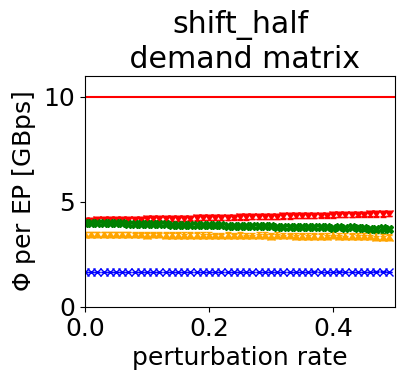

/tmp/ipykernel_3746044/2547614077.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(perturbations, plot_data[method_name], error_bars, color=colors[method_name],


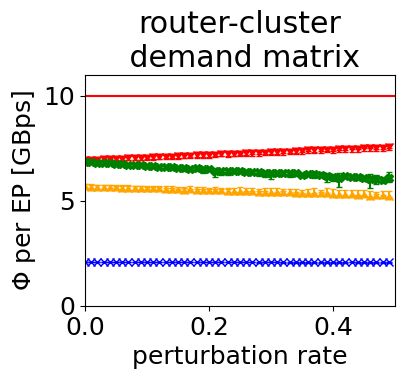

/tmp/ipykernel_3746044/2547614077.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(perturbations, plot_data[method_name], error_bars, color=colors[method_name],


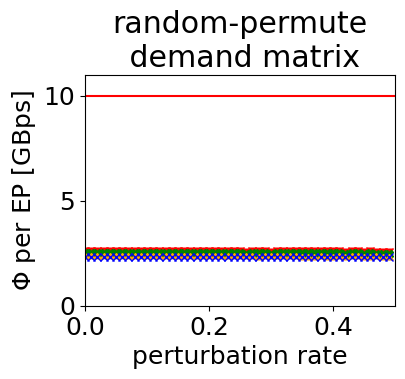

In [14]:
topo_name = "DDF"
V = 36
plot_for(topo_name, "uniform", V)
plot_for(topo_name, "nearst-neighbour", V)
plot_for(topo_name, "shift_1", V)
plot_for(topo_name, "shift_half", V)
plot_for(topo_name, "router-cluster", V)
plot_for(topo_name, "random-permute", V)

/tmp/ipykernel_3746044/2547614077.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(perturbations, plot_data[method_name], error_bars, color=colors[method_name],


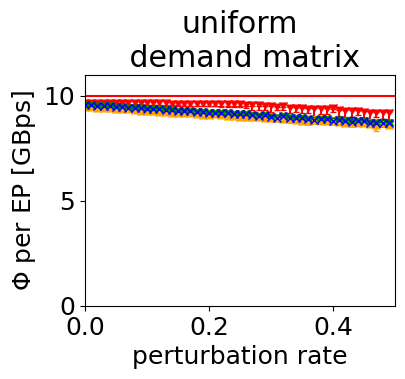

/tmp/ipykernel_3746044/2547614077.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(perturbations, plot_data[method_name], error_bars, color=colors[method_name],


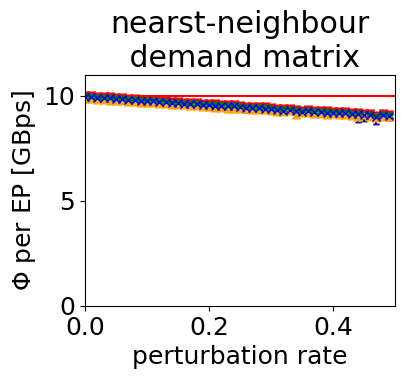

/tmp/ipykernel_3746044/2547614077.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(perturbations, plot_data[method_name], error_bars, color=colors[method_name],


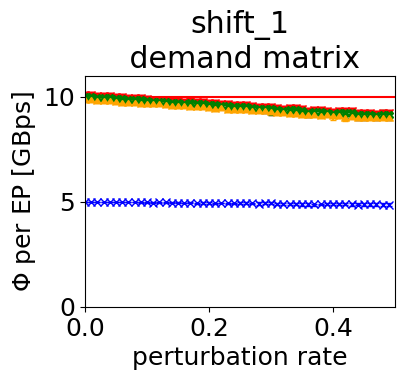

/tmp/ipykernel_3746044/2547614077.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(perturbations, plot_data[method_name], error_bars, color=colors[method_name],


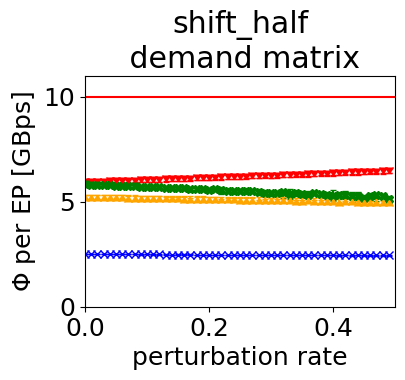

/tmp/ipykernel_3746044/2547614077.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(perturbations, plot_data[method_name], error_bars, color=colors[method_name],


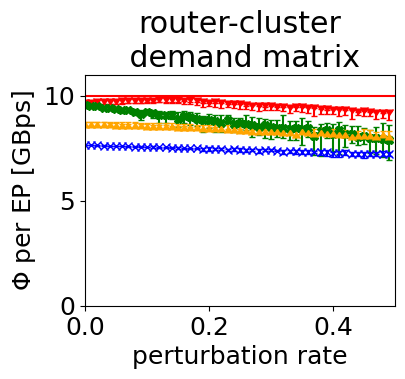

/tmp/ipykernel_3746044/2547614077.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(perturbations, plot_data[method_name], error_bars, color=colors[method_name],


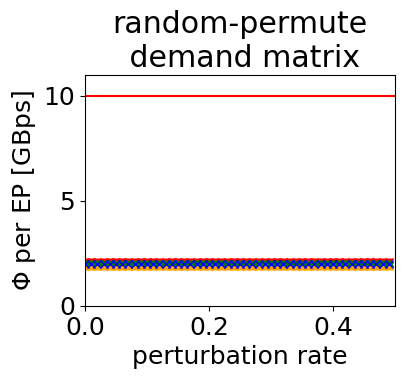

In [15]:
topo_name = "Slimfly"
V = 50
plot_for(topo_name, "uniform", V)
plot_for(topo_name, "nearst-neighbour", V)
plot_for(topo_name, "shift_1", V)
plot_for(topo_name, "shift_half", V)
plot_for(topo_name, "router-cluster", V)
plot_for(topo_name, "random-permute", V)

/tmp/ipykernel_3746044/2547614077.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(perturbations, plot_data[method_name], error_bars, color=colors[method_name],


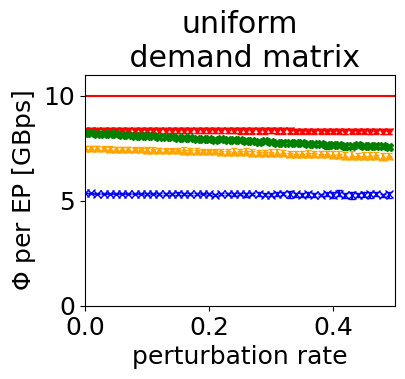

/tmp/ipykernel_3746044/2547614077.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(perturbations, plot_data[method_name], error_bars, color=colors[method_name],


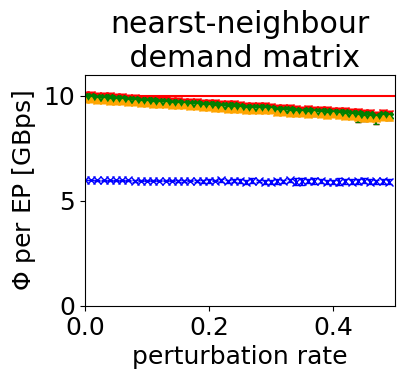

/tmp/ipykernel_3746044/2547614077.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(perturbations, plot_data[method_name], error_bars, color=colors[method_name],


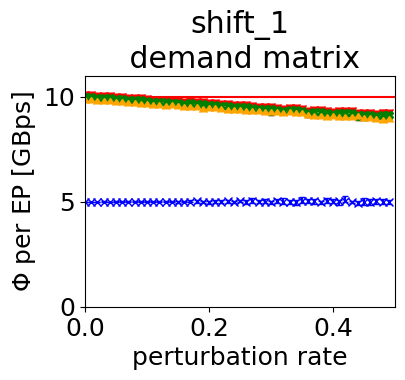

/tmp/ipykernel_3746044/2547614077.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(perturbations, plot_data[method_name], error_bars, color=colors[method_name],


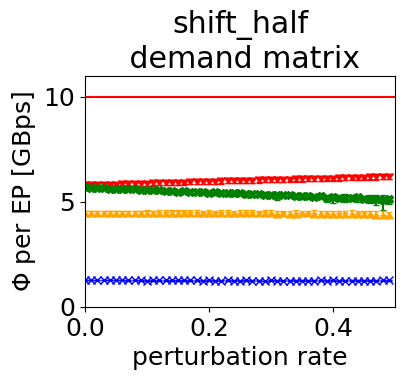

/tmp/ipykernel_3746044/2547614077.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(perturbations, plot_data[method_name], error_bars, color=colors[method_name],


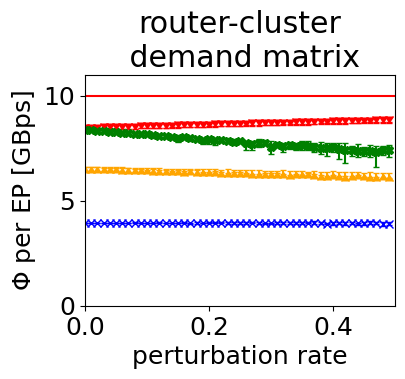

/tmp/ipykernel_3746044/2547614077.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(perturbations, plot_data[method_name], error_bars, color=colors[method_name],


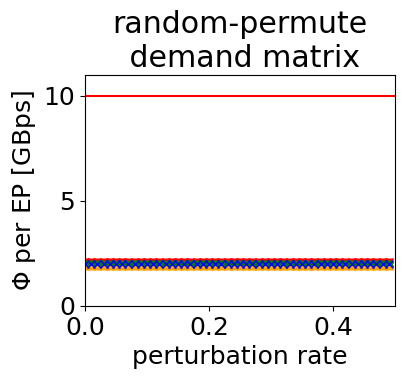

In [16]:
topo_name = "RRG_slimfly"
V = 50
plot_for(topo_name, "uniform", V)
plot_for(topo_name, "nearst-neighbour", V)
plot_for(topo_name, "shift_1", V)
plot_for(topo_name, "shift_half", V)
plot_for(topo_name, "router-cluster", V)
plot_for(topo_name, "random-permute", V)